In [1]:
from blade import ExperimentLogger
from blade import plot_convergence
import os

logger = ExperimentLogger('MA_BBOB-03-11_144611', True)

Failed to update token costs. Using static costs.
/home/neocortex/.cache/pypoetry/virtualenvs/blade-xXF9vABH-py3.10/lib/python3.10/site-packages/tokencost/constants.py:69: RuntimeWarning: coroutine 'update_token_costs' was never awaited
  logger.error("Failed to update token costs. Using static costs.")


In [2]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['RandomSearch', 'LLaMEA']
['MA_BOB']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_convergence2(data, budget=None):
    # Ensure the data is sorted by 'id' and 'fitness'
    #data = data.sort_values(by=['_id', 'fitness'], ascending=[True, False])
    
    data.replace([-np.Inf], 0, inplace=True)
    data.fillna(0, inplace=True)

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Get unique method names
    methods = data['method_name'].unique()
    
    for method in methods:
        method_data = data[data['method_name'] == method].copy()

        method_data = method_data.sort_values(by=['seed', '_id'])

        
        # Group by 'seed' and calculate the cumulative max fitness
        method_data['cummax_fitness'] = method_data.groupby('seed')['fitness'].cummax()
        
        # Calculate mean and std deviation of the cumulative max fitness
        summary = method_data.groupby('_id')['cummax_fitness'].agg(['mean', 'std']).reset_index()
        
        # Shift X-axis so that _id starts at 1
        summary['_id'] += 1  # Ensures _id starts at 1 instead of 0

        # Plot the mean fitness
        plt.plot(summary['_id'], summary['mean'], label=method)
        
        # Plot the shaded error region
        plt.fill_between(summary['_id'], summary['mean'] - summary['std'], summary['mean'] + summary['std'], alpha=0.2)
    
    # Add labels and legend
    plt.xlabel('Number of Evaluations')
    if budget is not None:
        plt.xlim(1, budget)
    plt.ylabel('Mean Best Fitness')
    plt.title('Convergence Plot')
    plt.legend(title='Algorithm')
    plt.grid(True)
    plt.show()

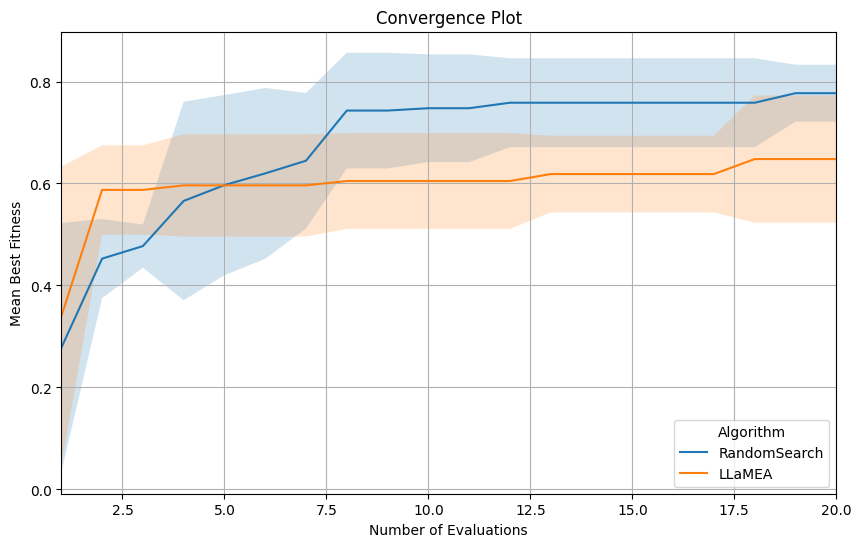

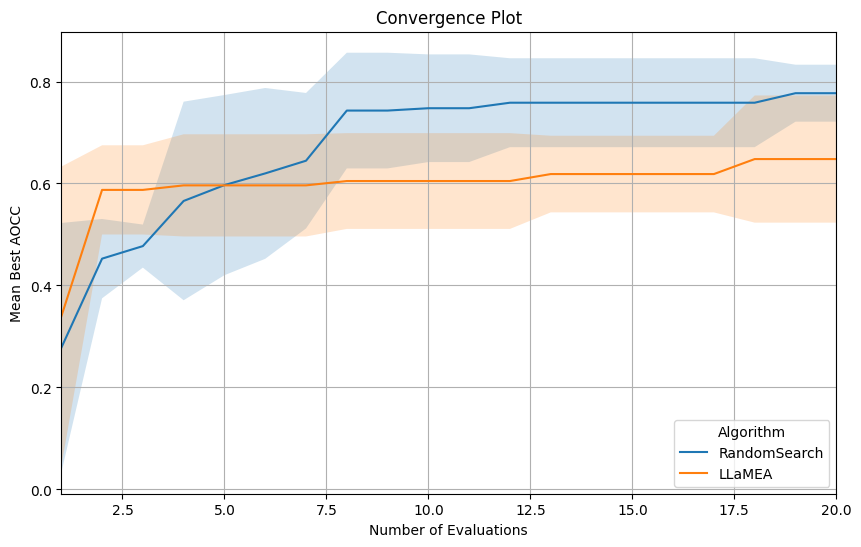

In [4]:
import numpy as np
data = logger.get_problem_data('MA_BOB')

data = data.drop(columns=['code', 'description', 'id', 'configspace', 'generation', 'feedback', 'error', 'metadata', 'operator'])


# method_data = data[data['method_name'] == "RandomSearch"].copy()
# method_data = method_data.sort_values(by=['seed', '_id'])
# method_data

plot_convergence2(data, budget=20)

plot_convergence(logger, metric="AOCC", save=False, budget=20)

#print(problem_data[["_id","id", "name", "fitness", "generation", "method_name", "problem_name", "seed"]].iloc[100:160])